# Assignment 1: Image Manipulation and Canny Edge Detection

---

Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

In [3]:
# install required packages specified in pipfile
!pipenv install

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.


Installing dependencies from Pipfile.lock (fd2ab2)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [4]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load a color image of your choice, preferably a picture you took yourself. Convert it to a color format of your choice, and display it. **(1.5 points)**

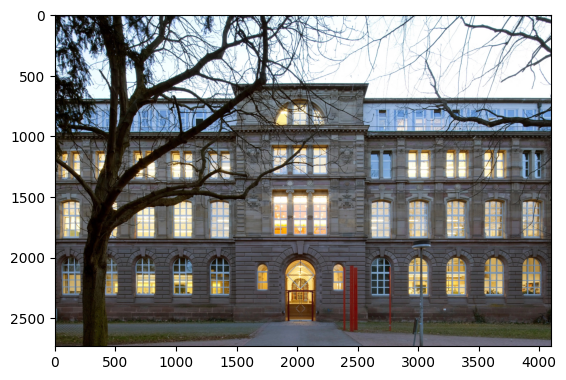

In [5]:
##### TODO: YOUR CODE GOES HERE
input_img = cv2.imread('..\\images\\HFT\\HFT_Bau1.jpg', 1)  

# Matplotlib expects img in RGB format but OpenCV provides it in BGR
img_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

# plot the image
plt.imshow(img_RGB)

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)** 

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

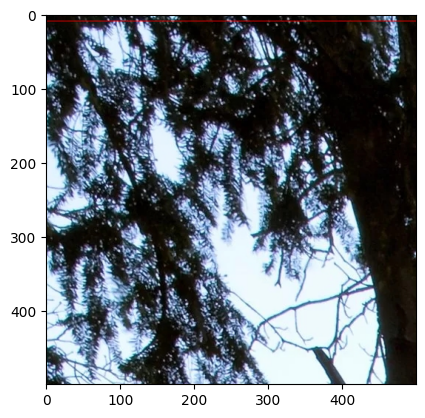

In [6]:
##### TODO: YOUR CODE GOES HERE
img_RGB[9,:] = [255,0,0]
plt.imshow(img_RGB[0:500, 0:500])

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)** 

In [7]:
##### TODO: YOUR CODE GOES HERE
print(img_RGB[8,-1])
print(img_RGB[9,0])

[ 90 162 184]
[255   0   0]


**TODO**: 1d) Flatten the color image, i.e., convert it from the 3D array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [8]:
##### TODO: YOUR CODE GOES HERE
print('original image shape:', img_RGB.shape)
img_1D_option1 = img_RGB.flatten()
print('flattened image shape option 1:', img_1D_option1.shape)
img_1D_option2 = img_RGB.reshape(img_RGB.shape[0]*img_RGB.shape[1]*img_RGB.shape[2])
print('flattened image shape option 2:', img_1D_option2.shape)
img_1D_option3 = img_RGB.reshape(-1)
print('flattened image shape option 3:', img_1D_option3.shape)

# Note: this gives a 2D array with one column, but we want a 1D array.
img_2D = img_RGB.reshape(img_RGB.shape[0]*img_RGB.shape[1]*img_RGB.shape[2], 1)
print('for comparison: 2D image shape option 1:', img_2D.shape)
img_2D = img_RGB.reshape(-1, 1)
print('for comparison: 2D image shape option 2:', img_2D.shape)



original image shape: (2733, 4096, 3)
flattened image shape option 1: (33583104,)
flattened image shape option 2: (33583104,)
flattened image shape option 3: (33583104,)
for comparison: 2D image shape option 1: (33583104, 1)
for comparison: 2D image shape option 2: (33583104, 1)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [9]:
##### TODO: YOUR CODE GOES HERE
print('original image:', img_RGB[8,-1])
print('flattened image:', img_1D_option1[(9*img_RGB.shape[1]-1)*3:(9*img_RGB.shape[1]-1)*3+3]) # the image has img_RGB.shape[1]=4096 columns and 3 channels
print('original image:', img_RGB[9,0])
print('flattened image:', img_1D_option1[(9*img_RGB.shape[1])*3:(9*img_RGB.shape[1])*3+3])

original image: [ 90 162 184]
flattened image: [ 90 162 184]
original image: [255   0   0]
flattened image: [255   0   0]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

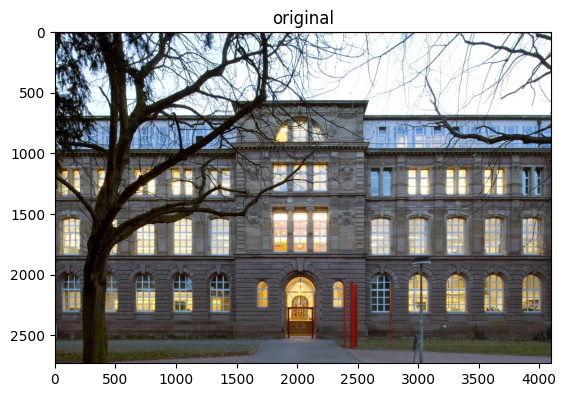

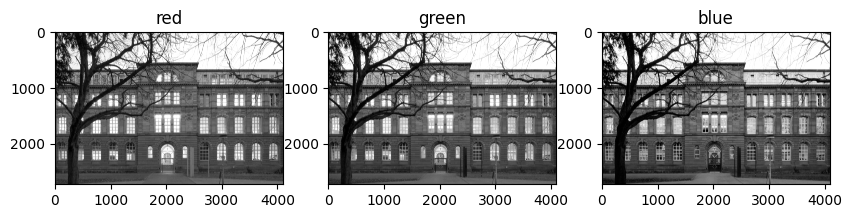

In [10]:
##### TODO: YOUR CODE GOES HERE
# split channels
r,g,b=cv2.split(img_RGB)
# show original image, then the three channels for comparison
plt.imshow(img_RGB)
plt.title('original')
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 30))
ax1.imshow(r,cmap = 'gray') 
ax1.title.set_text('red')
ax2.imshow(g,cmap = 'gray') 
ax2.title.set_text('green')
ax3.imshow(b,cmap = 'gray') 
ax3.title.set_text('blue')

**YOUR ANSWER**: The left image is red because of the vertical bar next to the entrance, which is red in the original image and bright in the left gray image. The right image is blue because the top floor of the building is blue originally and very light in the right grayscale image. Hence, the middle image is green.

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

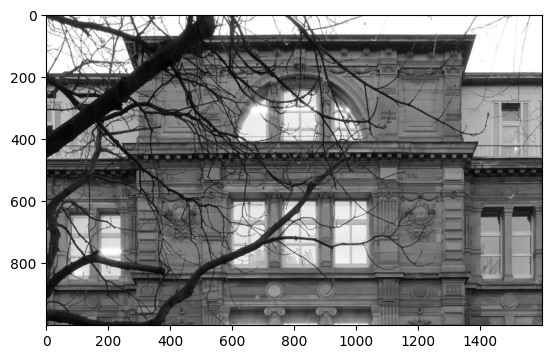

In [11]:
##### TODO: YOUR CODE GOES HERE
cutout_gray = img_gray[500:1500, 1200:2800]
plt.imshow(cutout_gray, cmap='gray')

**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red rectangle. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

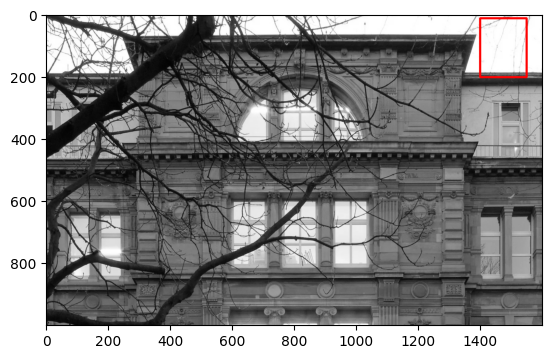

In [12]:
##### TODO: YOUR CODE GOES HERE
new_image = cv2.cvtColor(cutout_gray, cv2.COLOR_GRAY2RGB);

new_image = cv2.rectangle(new_image,
                        pt1=(1400,10),
                        pt2=(1550, 200),
                        color=(255, 0, 0),
                        thickness=5)
    
plt.imshow(new_image, cmap='gray')

**YOUR ANSWER**: The edges in the red rectangle might be difficult to detect because the contrast is quite low.

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`. **(2 points)**

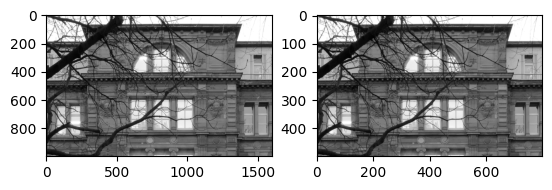

In [13]:
##### TODO: YOUR CODE GOES HERE
width = int(cutout_gray.shape[1]/2)
height = int(cutout_gray.shape[0]/2)
cutout_small = cv2.resize(cutout_gray, (width, height))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(cutout_gray, 'gray')
ax2.imshow(cutout_small, 'gray')

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

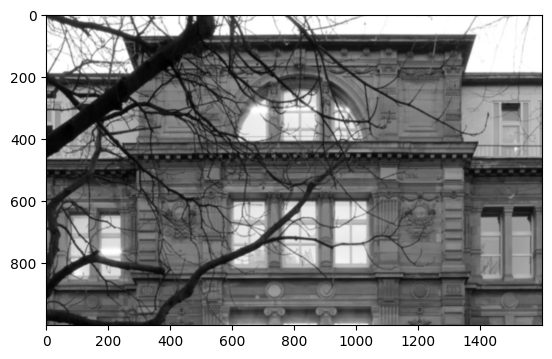

In [14]:
##### TODO: YOUR CODE GOES HERE
d=4 
cutout_blurred = cv2.GaussianBlur(cutout_gray, (2*d+1, 2*d+1), -1)
plt.imshow(cutout_blurred, cmap='gray')

**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)** 

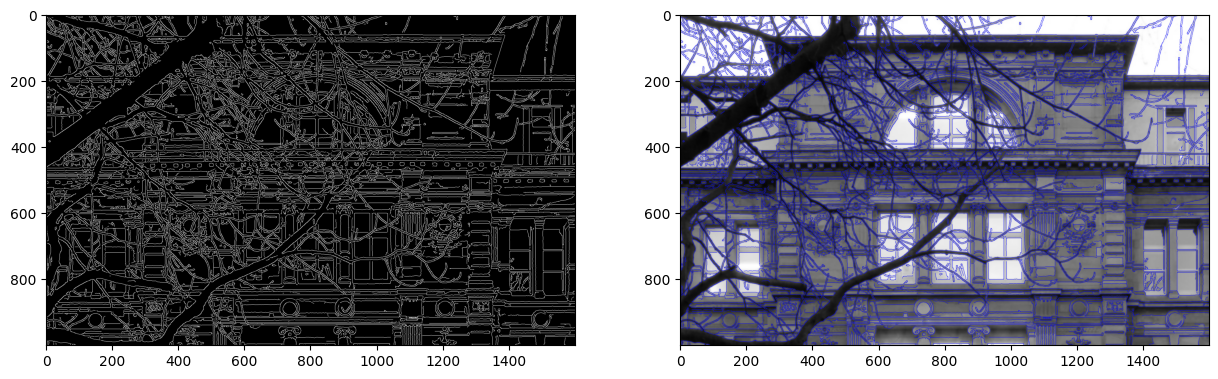

In [15]:
##### TODO: YOUR CODE GOES HERE
# lower and upper Canny thresholds
th1=12
th2=50 # Canny recommends threshold 2 is 3 times threshold 1 

# convert blurred image to RGB for colored edges
edgeresult = cv2.cvtColor(cutout_blurred, cv2.COLOR_GRAY2RGB)

edge = cv2.Canny(cutout_blurred, th1, th2)

edgeresult[edge != 0] = (0, 0, 255) # this takes pixels in edgeresult where edge is non-zero and colours them blue

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 30))
ax1.imshow(edge, cmap='gray')
ax2.imshow(edgeresult)

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

**YOUR ANSWER**: The predicted difficult area in the upper right corner was correct, there were some false negatives first. I eliminated most of the false negatives by setting a smaller value for the lower Canny threshold in order to continue more edges. On the other hand, there are some false positives in the center bottom part of the image (above the entrance).

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV! 

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**: Noise in images will introduce high derivatives in the image. This means, high derivatives do not only indicate edges, but also noise, the edges cannot be found directly. Therefore we blur the images first to reduce the noise, e.g. using Gaussian filtering or bilateral filtering. Noise can occur e.g. at low light conditions such as at nighttime.

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 3  \\ 
 4 & 5 & 6  \\ 
 7 & 8 & 9  \\ 
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**: 
$$
\begin{array}{c|ccc|c}
0 & 0 & 0 & 0 & 0 \\ 
\hline
0 & 1 & 2 & 3 & 0 \\ 
0 & 4 & 5 & 6 & 0 \\ 
0 & 7 & 8 & 9 & 0 \\ 
\hline
0 & 0 & 0 & 0 & 0 \\   
\end{array}
\otimes
\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}
=
\begin{array}{|ccc|}
\hline
7 & 4 & -7  \\ 
15 & 6 & -15  \\ 
13 & 4 & -13  \\ 
\hline   
\end{array}
$$

**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: The filter from task 3b) responds to vertical edges / high derivatives in x. This can be seen in the result from 3b), for example, the first column of the input image is a high increase in y, jumping from 0 to 1, from 0 to 4 and from 0 to 7 (due to zero padding). In the result, this is reflected by the high values in the first column (7, 15 and 13). In the last column of the input, the pixel values drop to zero, so the y-derivative is very negative. The filter result reflects this with very low negative numbers in the last column.

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**: 
$$
\begin{array}{c|ccc|c}
0 & 0 & 0 & 0 & 0 \\ 
\hline
0 & 1 & 2 & 3 & 0 \\ 
0 & 4 & 5 & 6 & 0 \\ 
0 & 7 & 8 & 9 & 0 \\ 
\hline
0 & 0 & 0 & 0 & 0 \\   
\end{array}
\star
\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}
=
\begin{array}{c|ccc|c}
0 & 0 & 0 & 0 & 0 \\ 
\hline
0 & 1 & 2 & 3 & 0 \\ 
0 & 4 & 5 & 6 & 0 \\ 
0 & 7 & 8 & 9 & 0 \\ 
\hline
0 & 0 & 0 & 0 & 0 \\   
\end{array}
\otimes
\begin{array}{|ccc|}
\hline
 1 & 0 & -1  \\ 
 1 & 0 & -1  \\ 
 1 & 0 & -1  \\ 
\hline   
\end{array}
=
\begin{array}{|ccc|}
\hline 
-7 & -4 & 7  \\ 
-15 & -6 & 15  \\ 
-13 & -4 & 13  \\
\hline   
\end{array}
$$